In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [273]:
AOD1 = 0.5
AOD2 = 5.0

In [274]:
z1 = np.arange(0,20001,500)
z2 = np.arange(0,20001,30)

In [275]:
dz1 = z1[1:]-z1[:-1]
dz2 = z2[1:]-z2[:-1]

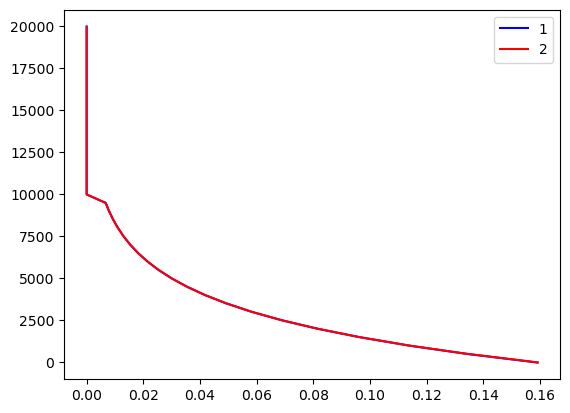

In [276]:
exp_decay1 = np.exp(-z1/3000)
exp_decay1[z1>=10000] = 0
exp_decay1 = exp_decay1/np.nansum(exp_decay1)

exp_decay2 = np.interp(z2,z1,exp_decay1)
exp_decay2 = exp_decay2

#exp_decay2 = np.exp(-z2/3000)
#exp_decay2[z2>=10000] = 0
#exp_decay2 = exp_decay2/np.nansum(exp_decay2)
plt.plot(exp_decay1,z1,c='b',label='1')
plt.plot(exp_decay2,z2,c='r',label='2')
plt.legend()
plt.show()

In [277]:
ext1=exp_decay1[:-1]*AOD1/(dz1)
ext2=exp_decay2[:-1]*AOD2/(dz2)
ext2 = AOD2 * ext2/np.nansum(ext2*dz2)

print(np.nansum(ext1*dz1))
print(np.nansum(ext2*dz2))



0.5
5.000000000000001


1.0
0.9999999999999999


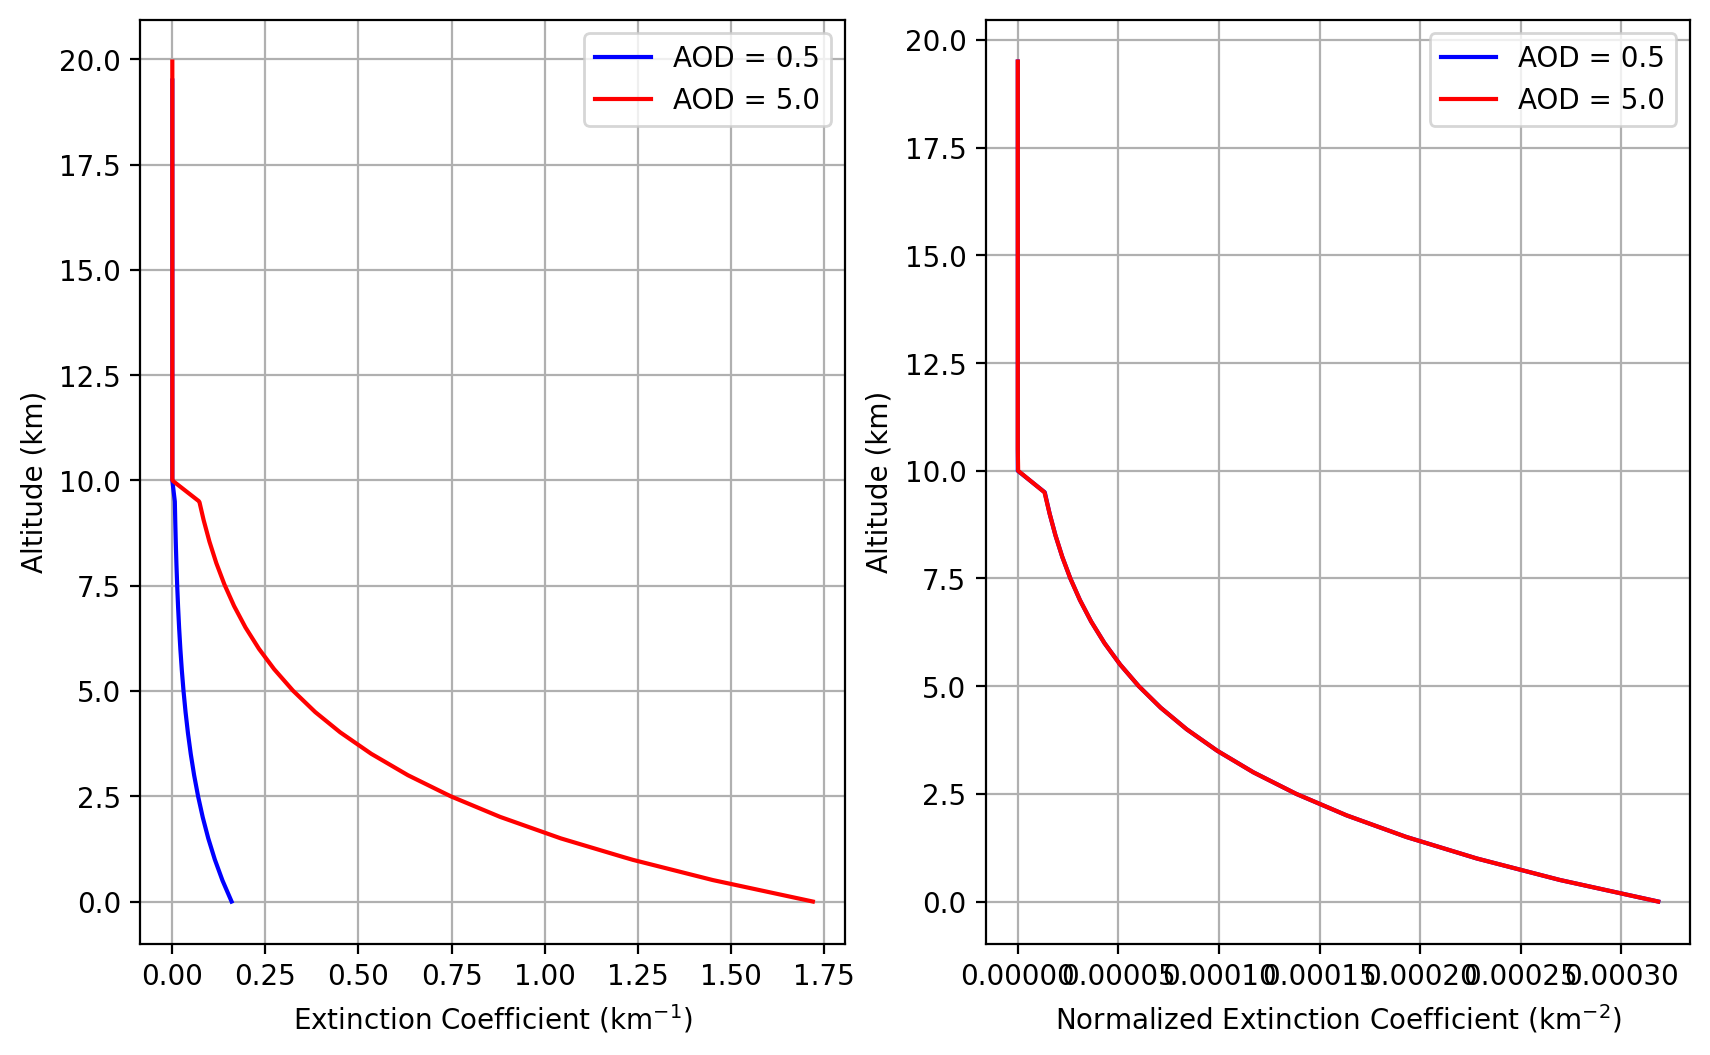

In [278]:

ext2_on1 = np.interp(z1[:-1],z2[:-1],ext2)
ext2_on1 = ext2_on1 * AOD2/np.nansum(ext2_on1*dz1)


next1 = ext1 / (AOD1)
next2 = ext2_on1 / (AOD2)

print(np.nansum(next1*dz1))
print(np.nansum(next2*dz1))


fig = plt.figure(figsize=(10,6),dpi=200)
ax1=plt.subplot(1,2,1)
ax1.plot(ext1*1000,z1[:-1]/1000,c='b',label=f'AOD = {AOD1}')
ax1.plot(ext2*1000,z2[:-1]/1000,c='r',label=f'AOD = {AOD2}')
plt.xlabel(r'Extinction Coefficient $\rm{(km^{-1})}$')
plt.ylabel('Altitude (km)')
plt.legend()
plt.grid()

ax2=plt.subplot(1,2,2)
ax2.plot(next1,z1[:-1]/1000,c='b',label=f'AOD = {AOD1}')
ax2.plot(next2,z1[:-1]/1000,c='r',label=f'AOD = {AOD2}')
plt.xlabel(r'Normalized Extinction Coefficient $\rm{(km^{-2})}$')
plt.ylabel('Altitude (km)')
plt.legend()
plt.grid()

plt.show()